## Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv"
notas = pd.read_csv(url)
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Verificando propriedade dos dados

In [4]:
notas.shape

(100836, 4)

In [5]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
notas.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Alterando nome das colunas para português-BR

In [7]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando a coluna nota

In [8]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

<Axes: >

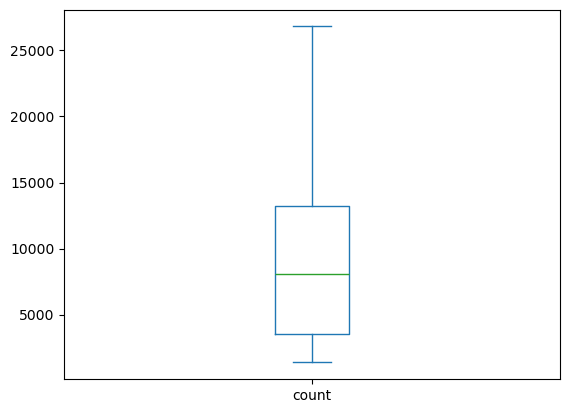

In [10]:
notas["nota"].value_counts().plot(kind='box')


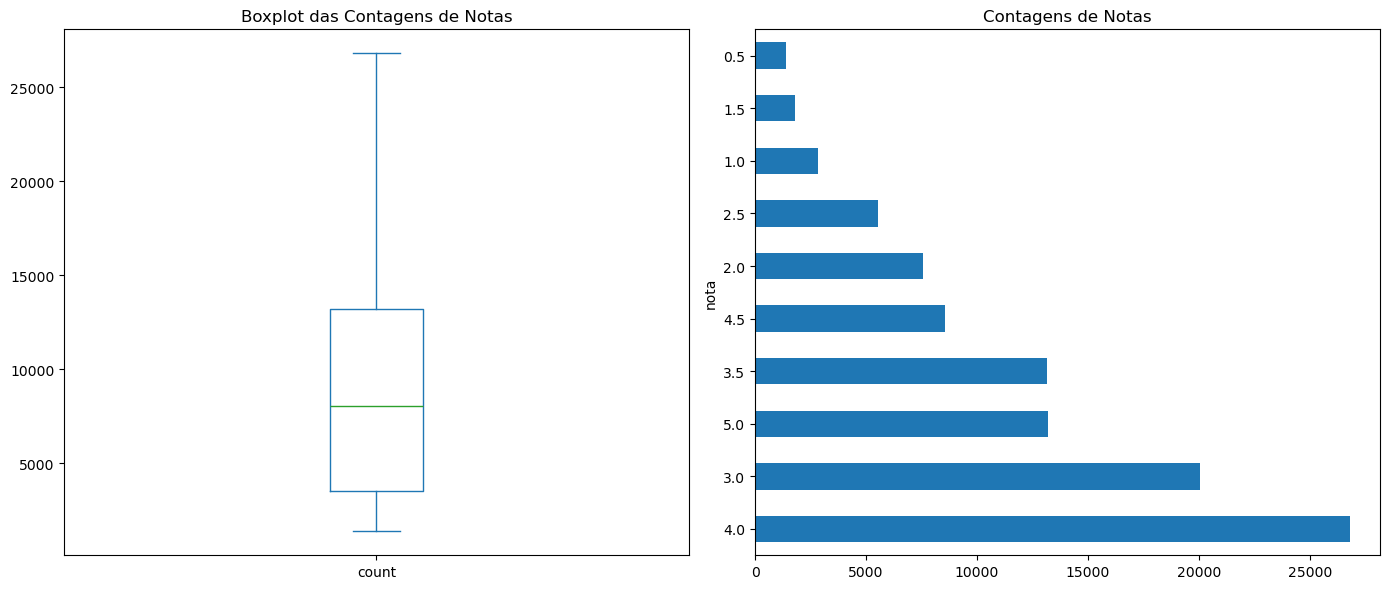

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Contagem dos valores na coluna 'nota'
value_counts = notas["nota"].value_counts()

# Criando uma figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de boxplot no primeiro eixo (ax1)
value_counts.plot(kind='box', ax=ax1)
ax1.set_title('Boxplot das Contagens de Notas')

# Plotando o gráfico de barras horizontais no segundo eixo (ax2)
value_counts.plot(kind='barh', ax=ax2)
ax2.set_title('Contagens de Notas')

# Ajustando o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()


## Pegando outra base de dados

In [12]:
url_ = "https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv"
filmes = pd.read_csv(url_)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Alterando nome das colunas

In [13]:
filmes.columns = ['filmeId','titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Verificando notas

In [14]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Média do filme cujo Id é 1 (Toy Story)

In [15]:
notas.query("filmeId == 1")["nota"].mean()

3.9209302325581397

## Média do filme cujo Id é 2 (Jumanji)

In [16]:
notas.query("filmeId==2")["nota"].mean()

3.4318181818181817

## Média de todos os filmes por filme usando groupby

In [17]:
medias_por_filme = notas.groupby(notas['filmeId'])[["nota"]].mean()
medias_por_filme

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


<Axes: ylabel='Frequency'>

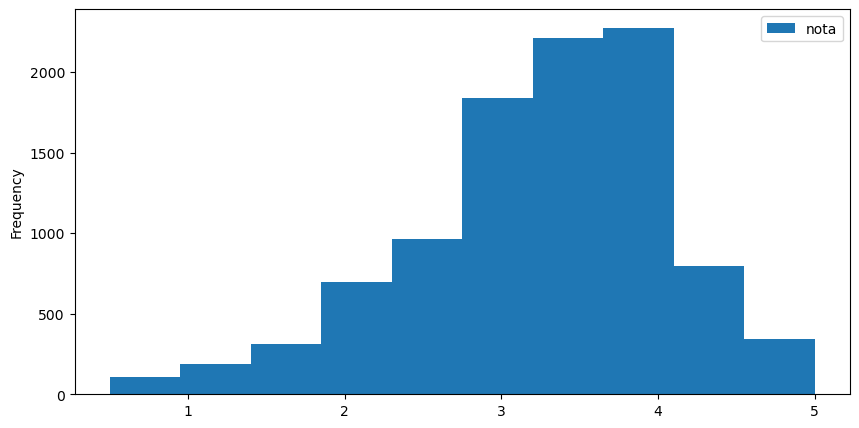

In [20]:
medias_por_filme.plot(kind='hist', figsize=(10,5))